# Jakob's Notebook for EDA

In [1]:
import pandas as pd
import seaborn as sns


In [3]:
wkdir = '../data/raw/'

df_errors = pd.read_csv(wkdir + 'PdM_errors.csv', parse_dates=['datetime'])
df_failures = pd.read_csv(wkdir + 'PdM_failures.csv', parse_dates=['datetime'])
df_machines = pd.read_csv(wkdir + 'PdM_machines.csv')
df_maint = pd.read_csv(wkdir + 'PdM_maint.csv', parse_dates=['datetime'])
df_telemetry = pd.read_csv(wkdir + 'PdM_telemetry.csv', parse_dates=['datetime'])

In [16]:
dframes = {'Errors':df_errors, 'Failures':df_failures, 'Machines':df_machines, 'Maintenance':df_maint, 'Telemetry':df_telemetry}


## Statistics

In [8]:
# print datatypes
for key, df in dframes.items():
    print(key, df.dtypes)


Errors datetime     datetime64[ns]
machineID             int64
errorID              object
dtype: object
Failures datetime     datetime64[ns]
machineID             int64
failure              object
dtype: object
Machines machineID     int64
model        object
age           int64
dtype: object
Maintenance datetime     datetime64[ns]
machineID             int64
comp                 object
dtype: object
Telemetry datetime     datetime64[ns]
machineID             int64
volt                float64
rotate              float64
pressure            float64
vibration           float64
dtype: object


In [21]:
# print statistics
for key, df in dframes.items():
    print(key, df.describe())

Errors                             datetime    machineID
count                           3919  3919.000000
mean   2015-07-01 03:34:18.586374144    51.044654
min              2015-01-01 06:00:00     1.000000
25%              2015-03-31 05:00:00    25.000000
50%              2015-07-01 06:00:00    51.000000
75%              2015-10-01 15:00:00    77.000000
max              2016-01-01 05:00:00   100.000000
std                              NaN    28.954988
Failures                             datetime   machineID
count                            761  761.000000
mean   2015-06-24 12:12:17.976346880   51.911958
min              2015-01-02 03:00:00    1.000000
25%              2015-03-23 06:00:00   24.000000
50%              2015-06-24 06:00:00   51.000000
75%              2015-09-23 06:00:00   79.000000
max              2015-12-31 06:00:00  100.000000
std                              NaN   29.515542
Machines         machineID         age
count  100.000000  100.000000
mean    50.500000   11.3

In [19]:
# Print first and last date in df's
for key, df in dframes.items():
    if key != 'Machines':
        print(f"{key}, min: {df['datetime'].min()}, max: {df['datetime'].max()}")
    pass

Errors, min: 2015-01-01 06:00:00, max: 2016-01-01 05:00:00
Failures, min: 2015-01-02 03:00:00, max: 2015-12-31 06:00:00
Maintenance, min: 2014-06-01 06:00:00, max: 2016-01-01 06:00:00
Telemetry, min: 2015-01-01 06:00:00, max: 2016-01-01 06:00:00


In [9]:
# print first rows
for key, df in dframes.items():
    print(key, df.head(3))

Errors              datetime  machineID errorID
0 2015-01-03 07:00:00          1  error1
1 2015-01-03 20:00:00          1  error3
2 2015-01-04 06:00:00          1  error5
Failures              datetime  machineID failure
0 2015-01-05 06:00:00          1   comp4
1 2015-03-06 06:00:00          1   comp1
2 2015-04-20 06:00:00          1   comp2
Machines    machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8
Maintenance              datetime  machineID   comp
0 2014-06-01 06:00:00          1  comp2
1 2014-07-16 06:00:00          1  comp4
2 2014-07-31 06:00:00          1  comp3
Telemetry              datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  


## Plots

<Axes: xlabel='datetime', ylabel='machineID'>

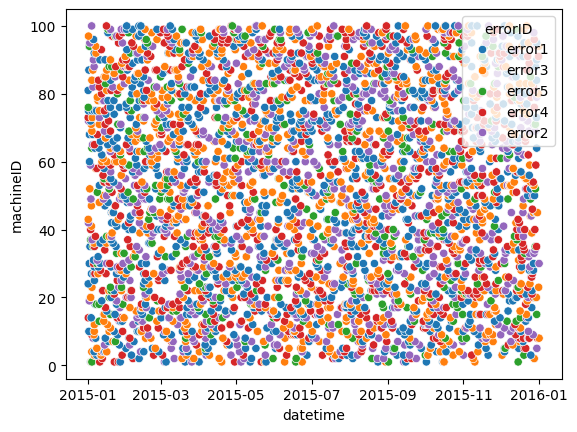

In [23]:
# plot Errors data
sns.scatterplot(data=df_errors, x='datetime', y='machineID', hue='errorID')

<Axes: xlabel='datetime', ylabel='machineID'>

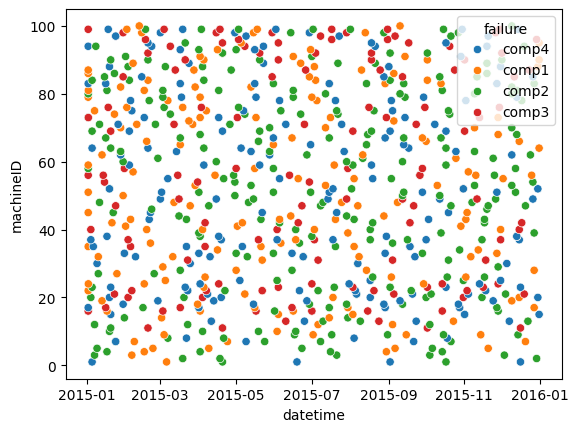

In [24]:
# plot Failures data
sns.scatterplot(data=df_failures, x='datetime', y='machineID', hue='failure')

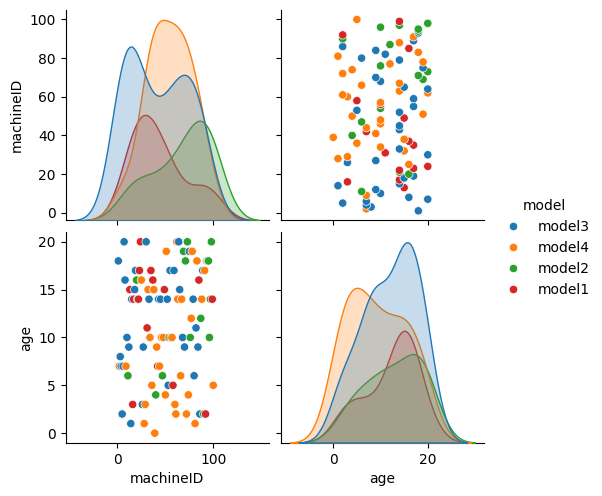

In [25]:
# plot Machines data
sns.pairplot(data=df_machines, hue='model')

<Axes: xlabel='datetime', ylabel='machineID'>

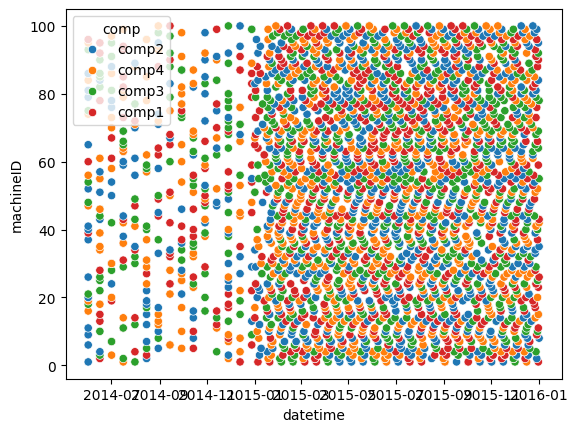

In [26]:
# Plot Maintenance data
sns.scatterplot(data=df_maint, x='datetime', y='machineID', hue='comp')

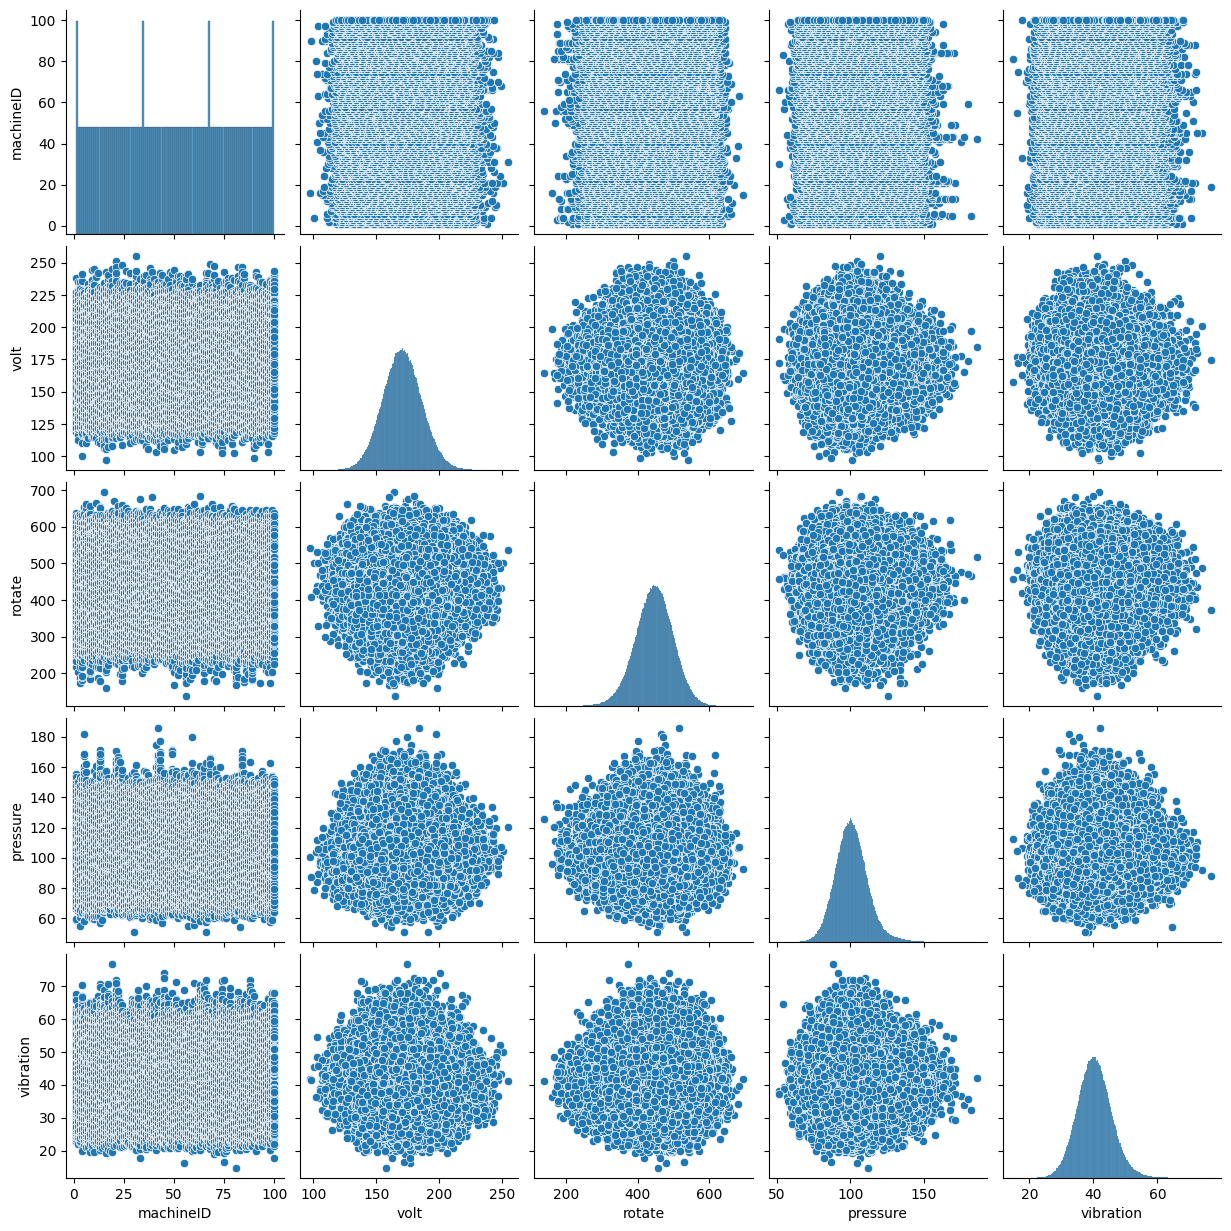

In [22]:
# Plot Telemetry data
sns.pairplot(data=df_telemetry)